Dataset values are below: 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

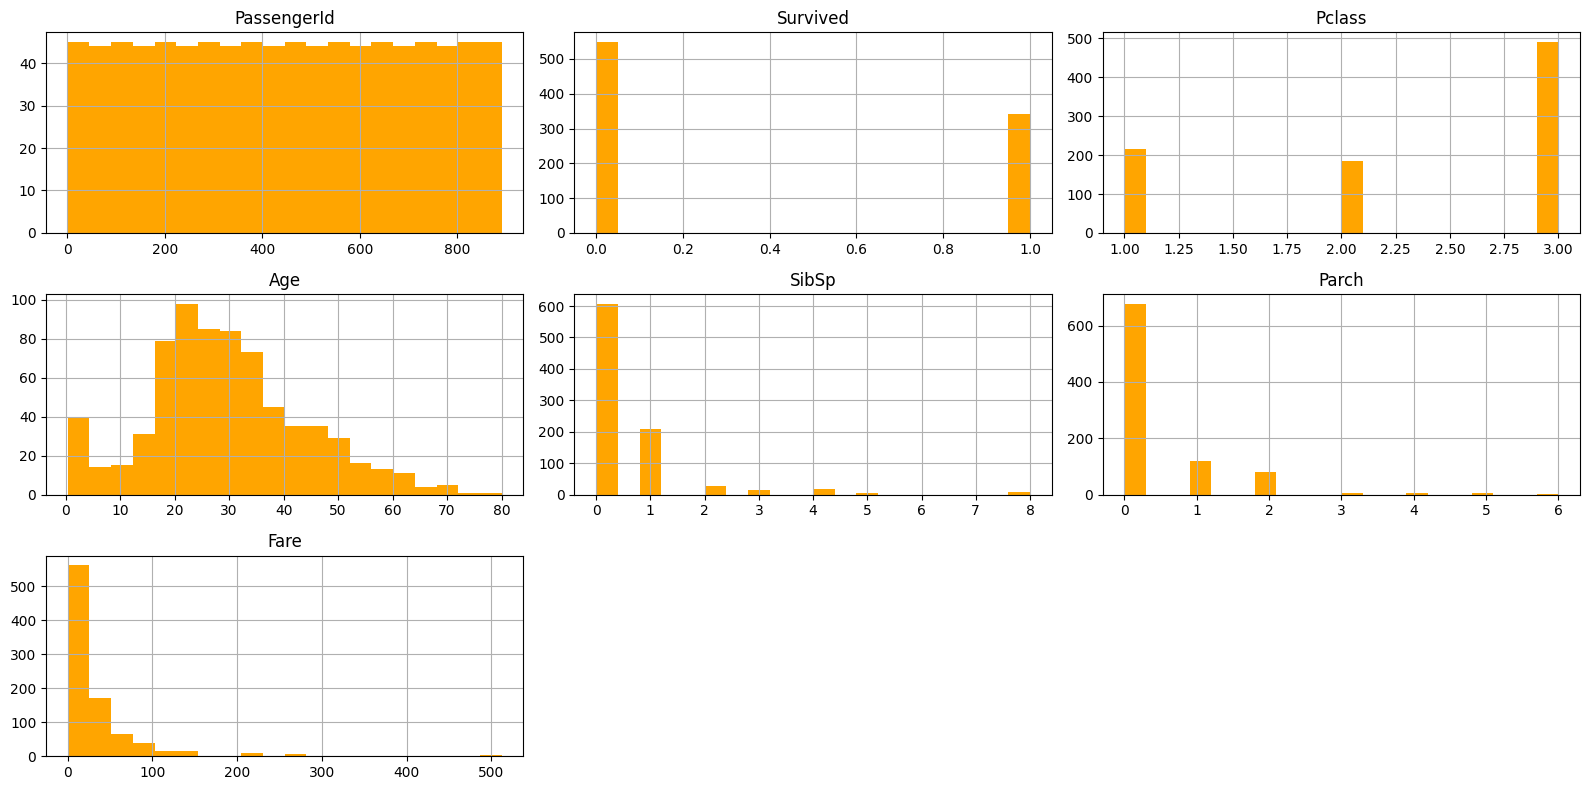

In [19]:
## 2.	Task 2: Data Exploration with Python 
#a.	Perform exploratory data analysis (EDA) using Python for the first dataset. 
#b.	Generate summary statistics, identify data types, and visualize the data distribution to gain insights into the dataset.

import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset from local
data_url = "C:/Users/venka/Downloads/titanic.csv"  
df = pd.read_csv(data_url)

# To display the first few rows
print("Dataset values are below: \n")
print(df.head(),"\n")

# To displaying Summary 
print("Data summary")
print(df.describe(),"\n")

# To display missing values and datatypes
print("Displaying the datatypes below\n")
print(df.dtypes)

# verifying the duplicates
print("\nDuplicates values in the dataset:", df.duplicated().sum()) 

#Dataset visualization
# Histogram of numerical columns
df.hist(figsize=(16, 8), bins=20, color="orange")
plt.title("Histograms for all the numerical columns")
plt.tight_layout()
plt.show()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   
21           22         1       2   
23           24         1       1   
27           28         0       1   
31           32         1       1   
52           53         1       1   

                                                 Name     Sex        Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
6                             McCarthy, Mr. Timothy J    male  54.000000   
10                    Sandstrom, Miss. Margueri

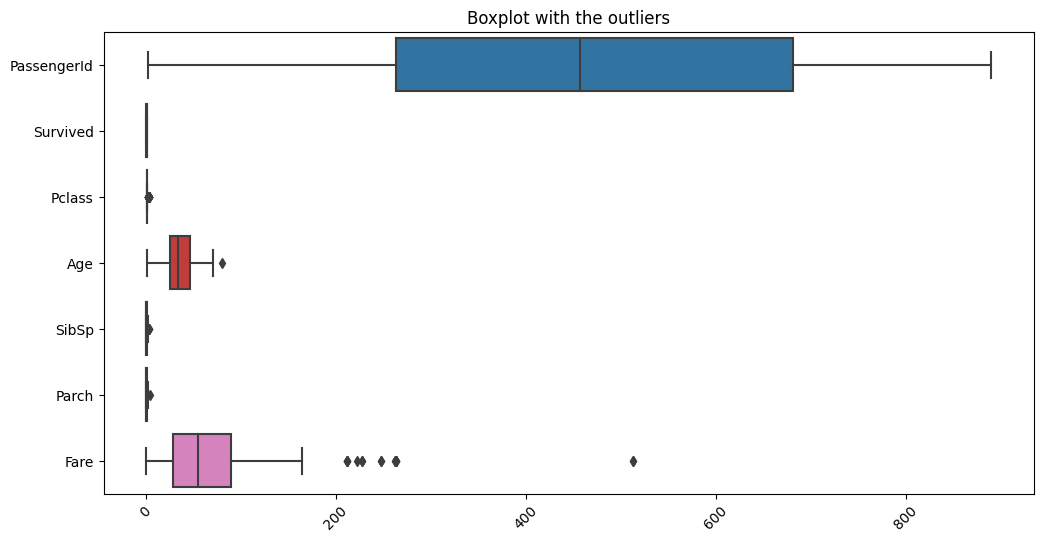

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
..                                                 ...     ...   ... 

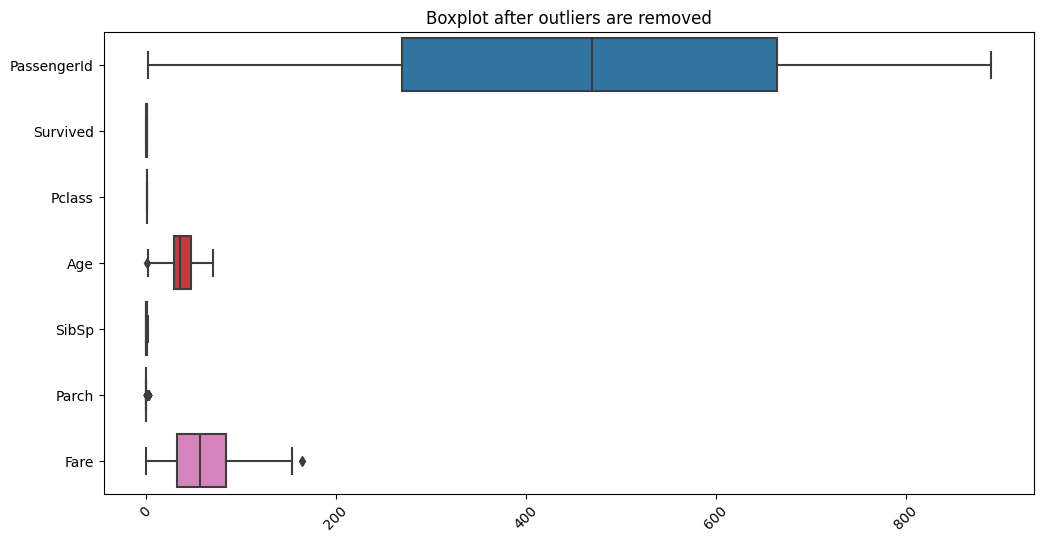

    PassengerId  Survived  Pclass  \
1             2       1.0     0.0   
3             4       1.0     0.0   
6             7       0.0     0.0   
10           11       1.0     1.0   
11           12       1.0     0.0   
21           22       1.0     0.5   
23           24       1.0     0.0   
27           28       0.0     0.0   
31           32       1.0     0.0   
52           53       1.0     0.0   

                                                 Name     Sex       Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.468892   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.430956   
6                             McCarthy, Mr. Timothy J    male  0.671219   
10                    Sandstrom, Miss. Marguerite Rut  female  0.038948   
11                           Bonnell, Miss. Elizabeth  female  0.721801   
21                              Beesley, Mr. Lawrence    male  0.418311   
23                       Sloper, Mr. William Thompson    male  0.34

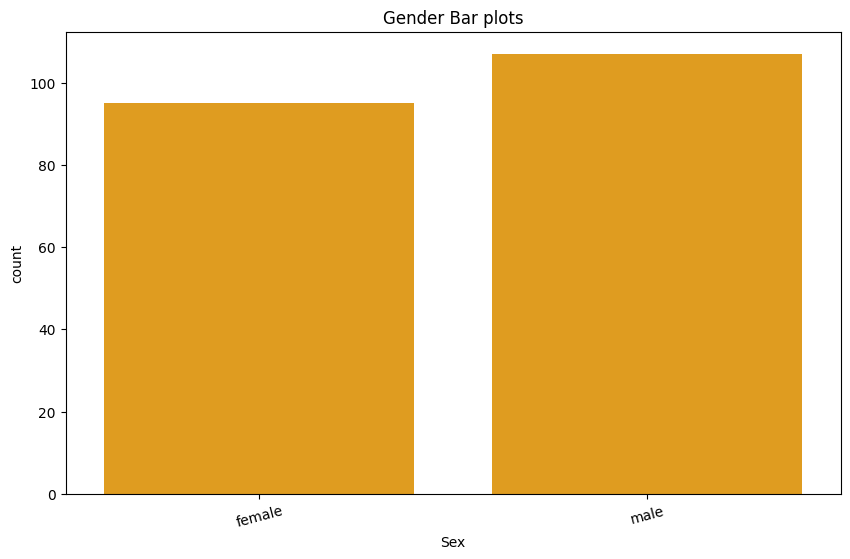

In [15]:
# 3.	Task 3: Data Preprocessing with Python 
#a.	Preprocess the data from the first dataset using Python. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Again loading the dataset
data_url = "C:/Users/venka/Downloads/titanic.csv"
df = pd.read_csv(data_url)

# Verifying for the missing values in the dataset 
print(df.isnull().sum())



##### 3. b.	Handle missing values, outliers, and perform feature engineering 
#####   when necessary to prepare the data for machine learning models.
# Removing missing values using mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.dropna(inplace=True)
print(df.head(10),"\n")

# Checking for the outliers using box plots
dfcolumns = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[dfcolumns], orient='h')
plt.xticks(rotation=45)
plt.title("Boxplot with the outliers")
plt.show()

#Eliminating the existing outliers
Q1 = df[dfcolumns].quantile(0.25)
Q3 = df[dfcolumns].quantile(0.75)
IQR = Q3 - Q1

removeoutliers = df[~((df[dfcolumns] < (Q1 - 1.5 * IQR)) | (df[dfcolumns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(removeoutliers)

plt.figure(figsize=(12, 6))
sns.boxplot(data=removeoutliers[dfcolumns], orient='h')
plt.xticks(rotation=45)
plt.title("Boxplot after outliers are removed")
plt.show()

#Normalization
#Using MinMaxScaler

scaler = MinMaxScaler()
dfcolumns = ['Age', 'Survived', 'Pclass', 'SibSp','Parch', 'Fare']
df[dfcolumns] = scaler.fit_transform(df[dfcolumns])
print(df.head(10))



####### Task 4: Implement Machine Learning Models with Python 
#######         a.Implement at least two different machine learning models for the first dataset using Python. 

 # Defining axis (X) and target (y)
X = df[dfcolumns]
y = df['Sex']

# Training and testing sets after spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Initializing the models
rf_M = RandomForestClassifier(random_state=42)
svm_M = SVC(random_state=42)

# Training the initialized models
rf_M.fit(X_train, y_train)
svm_M.fit(X_train, y_train)

# Predictions using Randon Forest(RF) and Support Vector Machine (SVM) models
rf_M_predict = rf_M.predict(X_test)
svm_M_predict = svm_M.predict(X_test)


##### 4. b.Evaluate and compare the performance of each model using appropriate metrics 
#####  to determine the most suitable model for the dataset.
# Evaluation metrics
def modelEvaluation(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"{model_name} Model Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {model_name} Model:\n{report}")

modelEvaluation(rf_M_predict, "Random Forest")
modelEvaluation(svm_M_predict, "Support Vector Machine")



###### Task 5: Visualization with Python 
# a.Create meaningful visualizations (e.g., scatter plots, heatmaps, bar charts) for the first dataset using Python. 
# b.Use libraries like Matplotlib, Seaborn, or Plotly to create clear and insightful visual representations of the dataset.

plt.figure(figsize=(10, 6)) 
sns.countplot(x="Sex", data=df, color='orange') 
plt.xticks(rotation=15) 
plt.title("Gender Bar plots") 
plt.show()
